Dimenction 
Estimated Dimensions (X, Y, Z) for book1.png: 432, 575, 255


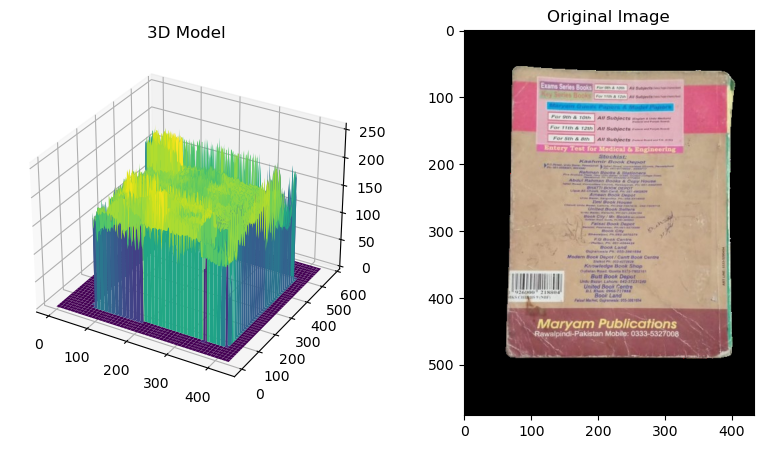

Dimenction 
Estimated Dimensions (X, Y, Z) for book2.png: 432, 576, 226


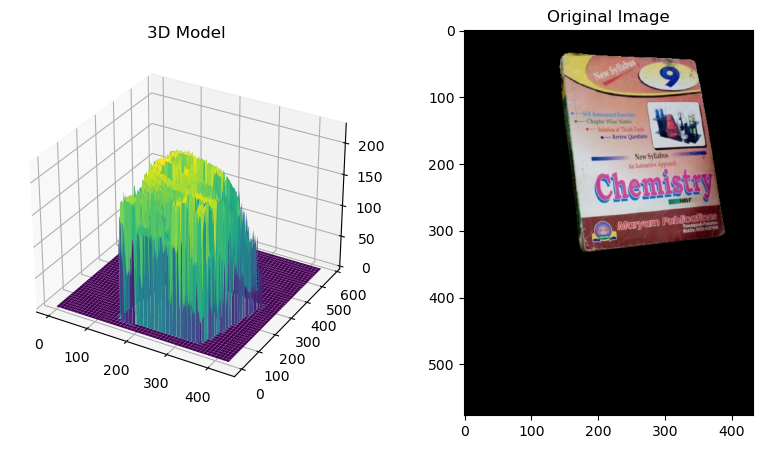

Accuracy for book2.png: 97.62282091917591%
Dimenction 
Estimated Dimensions (X, Y, Z) for laptop.png: 501, 496, 254


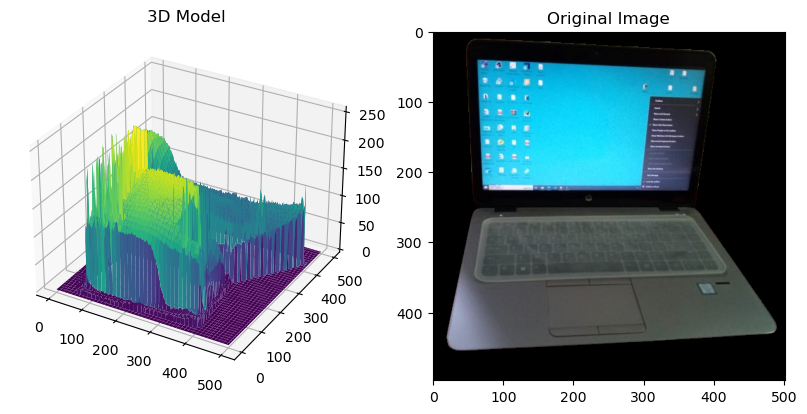

Accuracy for laptop.png: 85.65640194489465%


In [21]:

import cv2
import os
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

def calculate_accuracy(ground_truth, estimated):
    # Avoid division by zero
    if ground_truth == 0:
        return 0
    accuracy = 100 * (1 - np.sum(np.abs(np.array(previous_dimensions) - np.array(current_dimensions))) / np.sum(np.array(previous_dimensions)))
    return accuracy
# List of image paths
image_paths = [
    'book1.png',
    'book2.png',
    'laptop.png',
]



# Initialize dimensions for the first image
previous_dimensions = None
for image_path in image_paths:
    # Load the image
    image = cv2.imread(image_path)

    # Check if the image is loaded successfully
    if image is None:
        print(f"Error: Unable to load the image {image_path}")
        continue

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Use the depth information to create a 3D model
    height, width = gray.shape
    x, y = np.meshgrid(range(width), range(height))
    z = gray

    # Calculate dimensions based on image pixel coordinates
    x_size = np.max(x) - np.min(x)
    y_size = np.max(y) - np.min(y)
    z_size = np.max(z) - np.min(z)

    # Display dimensions
    print("Dimenction ")
  
    print(f"Estimated Dimensions (X, Y, Z) for {image_path}: {x_size}, {y_size}, {z_size}")
    # Create a 3D plot
    fig = plt.figure(figsize=(10, 5))

    # Plot the 3D model
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.plot_surface(x, y, z, cmap='viridis')
    ax1.set_title('3D Model')

    # Display the original 2D image
    ax2 = fig.add_subplot(122)
    ax2.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax2.set_title('Original Image')

    # Show the plot
    plt.show()

    # Calculate accuracy (skip for the first image since there is no previous image)
    if previous_dimensions is not None:
        current_dimensions = (x_size, y_size, z_size)
        accuracy = calculate_accuracy(previous_dimensions, current_dimensions)
        print(f"Accuracy for {image_path}: {accuracy}%")

    # Update previous dimensions for the next iteration
    previous_dimensions = (x_size, y_size, z_size)
